In [1]:
from importlib import reload
import src.data
import cascade_failure.simple_cascade
import src.visualization
import src.atack
reload(cascade_failure.simple_cascade)
reload(src.data)
reload(src.visualization)
reload(src.atack)

from src.data import load_data_with_attributes
from src.visualization import draw_graph_after_failure, draw_graph_with_node_highlighted
from cascade_failure.simple_cascade import cascade_failure_equal_load_distribution, cascade_failure_proportional_load_distribution
from src.atack import random_node_attack, high_degree_node_attack, high_load_capacity_ratio_node_attack, high_load_capacity_ratio_and_degree_node_attack

In [2]:
G = load_data_with_attributes()

Graph loaded: 4941 nodes, 6594 edges


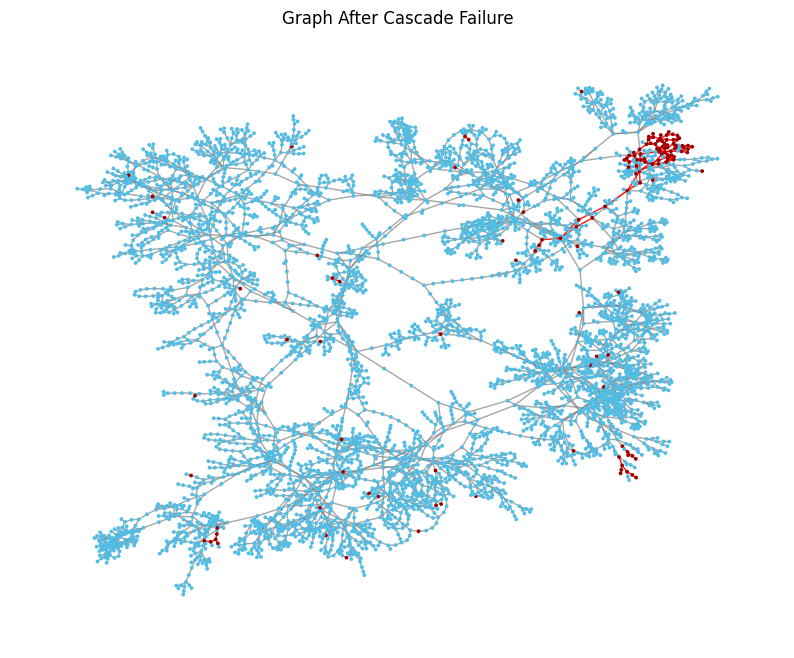

Number of cascade steps: 17
Failed nodes per step: [8, 8, 8, 7, 4, 4, 3, 4, 6, 5, 7, 4, 3, 7, 12, 6, 0]
Final outputs: {'num_failed_nodes': 139, 'num_intact_nodes': 4802, 'size_largest_cc': 4640}


In [3]:
attacked_nodes = high_load_capacity_ratio_node_attack(G, number_of_nodes=50)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
print(f"Number of cascade steps: {steps}")
print(f"Failed nodes per step: {failed_per_step}")
print(f"Final outputs: {outputs}")

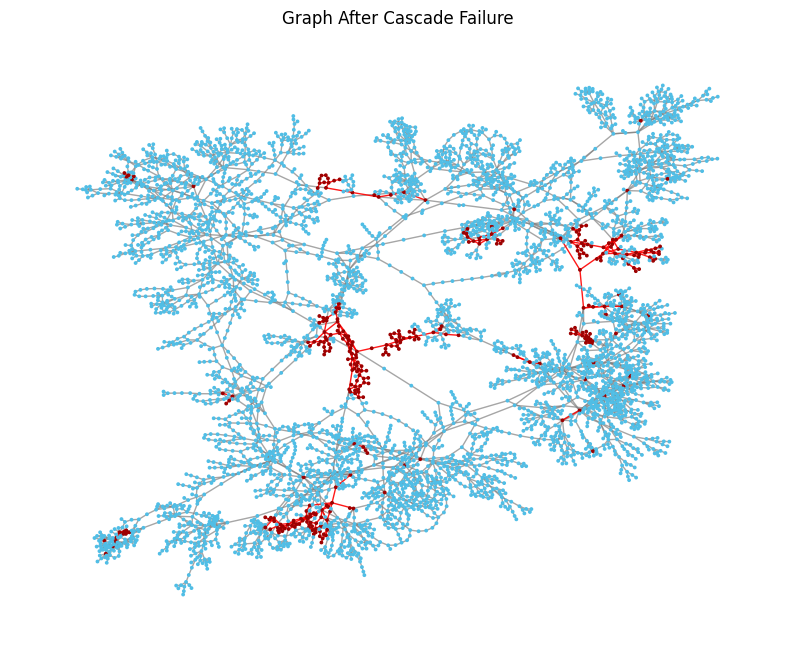

Number of cascade steps: 33
Failed nodes per step: [17, 20, 23, 15, 18, 20, 9, 13, 13, 10, 12, 17, 9, 9, 13, 11, 6, 5, 7, 10, 11, 6, 5, 2, 1, 1, 3, 1, 1, 4, 5, 1, 0]
Final outputs: {'num_failed_nodes': 335, 'num_intact_nodes': 4606, 'size_largest_cc': 4425}


In [4]:
attacked_nodes = high_load_capacity_ratio_and_degree_node_attack(G, number_of_nodes=50)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
print(f"Number of cascade steps: {steps}")
print(f"Failed nodes per step: {failed_per_step}")
print(f"Final outputs: {outputs}")

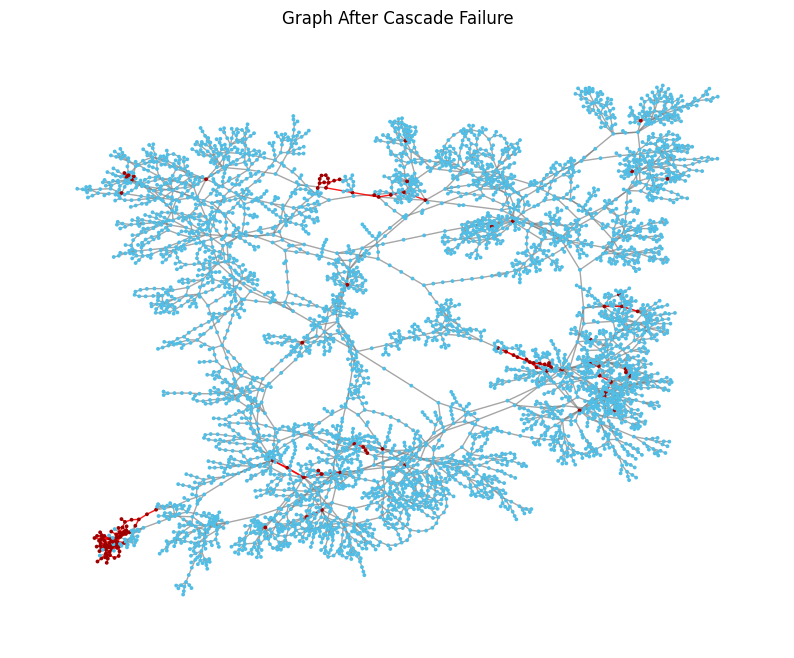

Number of cascade steps: 12
Failed nodes per step: [16, 10, 8, 7, 11, 11, 12, 14, 12, 3, 1, 0]
Final outputs: {'num_failed_nodes': 148, 'num_intact_nodes': 4793, 'size_largest_cc': 4532}


In [5]:
attacked_nodes = high_degree_node_attack(G, number_of_nodes=50)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
print(f"Number of cascade steps: {steps}")
print(f"Failed nodes per step: {failed_per_step}")
print(f"Final outputs: {outputs}")

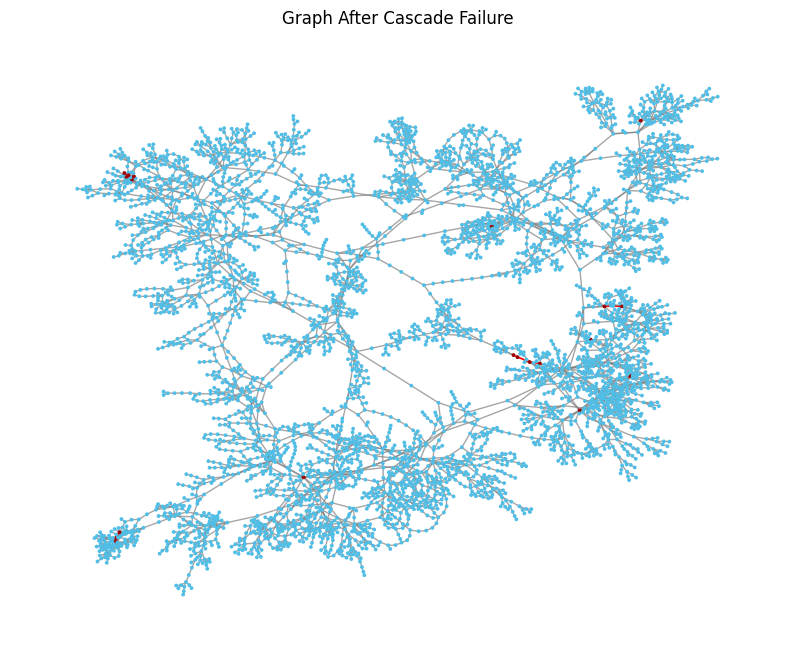

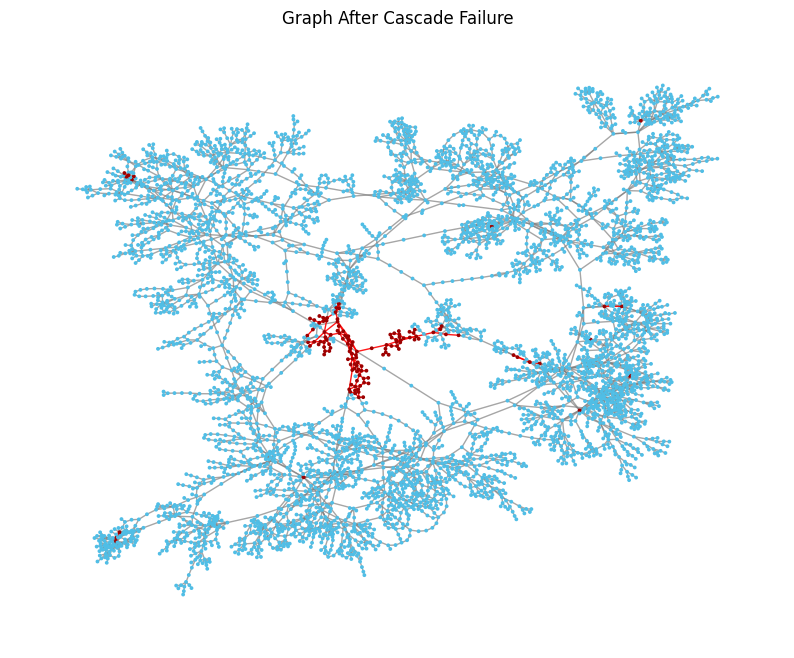

Critical node whose failure causes significant cascade: 384


In [7]:
attacked_nodes = high_load_capacity_ratio_and_degree_node_attack(G, number_of_nodes=13)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
failed_nodes_47 = [n for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"]]

attacked_nodes = high_load_capacity_ratio_and_degree_node_attack(G, number_of_nodes=14)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
failed_nodes_48 = [n for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"]]

node = None
for n in failed_nodes_48:
    if n not in failed_nodes_47:
        node=n
        break
print("Critical node whose failure causes significant cascade:", node)

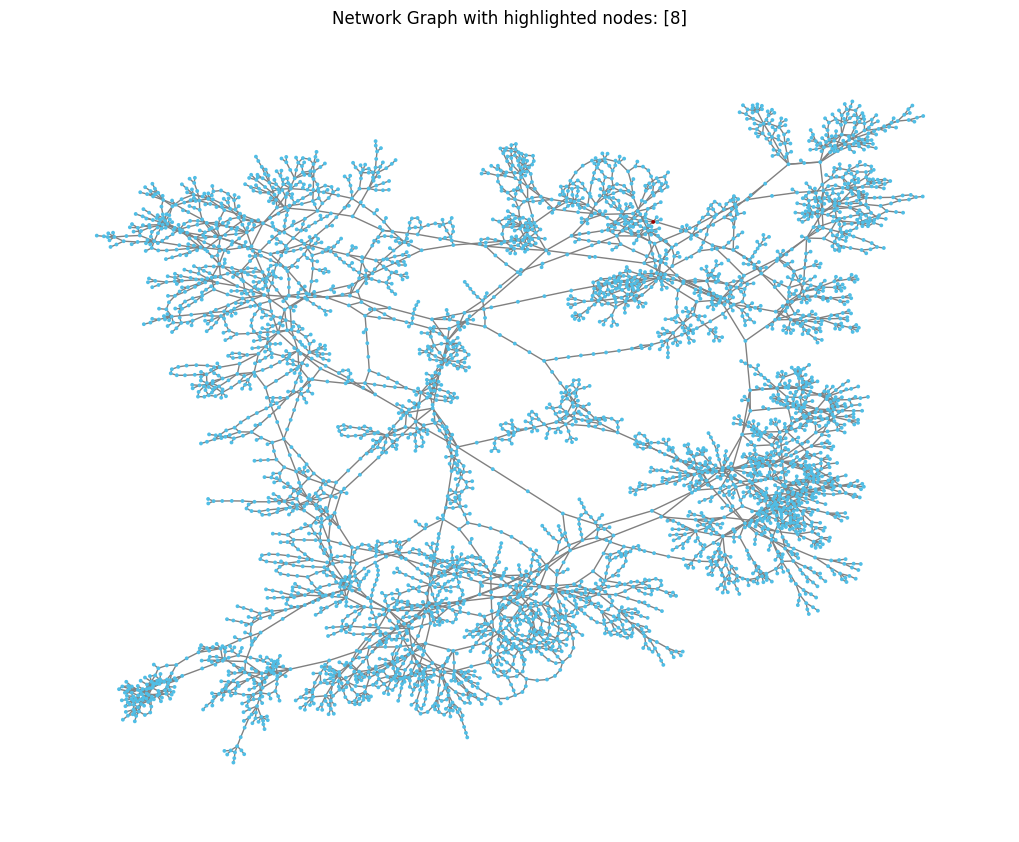

In [29]:
draw_graph_with_node_highlighted(G, [8])

Load of node 8: 20.885424887303657
Capacity of node 8: 36.60728621977991
Degree of node 8: 3


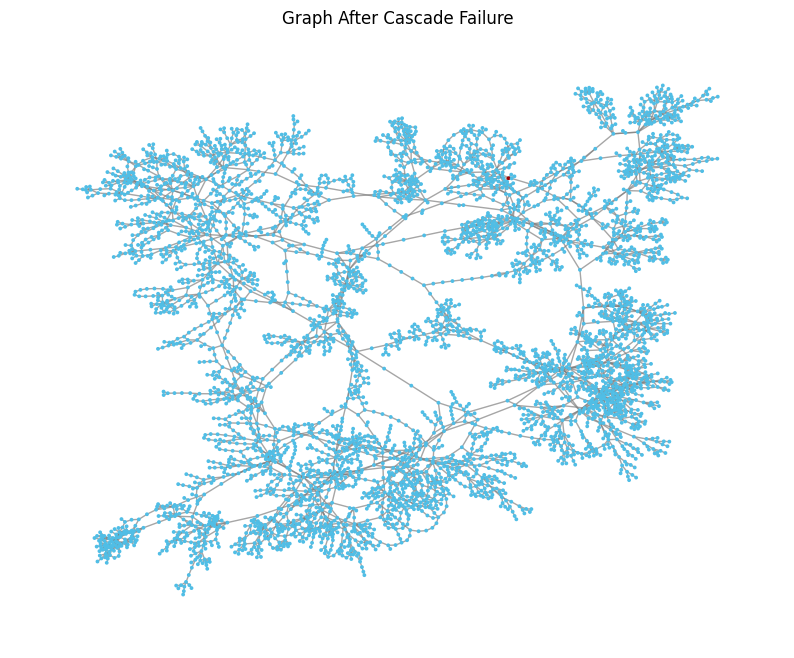

In [8]:
attacked_nodes = [8]
degree_of_node_8 = G.degree(8)
capacity_of_node_8 = G.nodes[8]['capacity']
load_of_node_8 = G.nodes[8]['load']
print("Load of node 8:", load_of_node_8)
print("Capacity of node 8:", capacity_of_node_8)
print("Degree of node 8:", degree_of_node_8)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
